In [1]:
import numpy as np
import pandas as pd
from glob import glob
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
def plot(file):
    simbad_name = csv_file.split('/')[-1].split(',')[0]
    df = pd.read_csv(csv_file, dtype={'obsID':'string'})

    rate_s = df[df['BAND'] == 'SOFT']['Rate']
    rate_h = df[df['BAND'] == 'HARD']['Rate']
    rate_hr= df[df['BAND'] == 'HR']['Rate']
    
    fig, ax = plt.subplots(1,2, figsize=(16,8))
    ax[0].plot(rate_hr, rate_h, marker='s', label=simbad_name)
    ax[1].plot(rate_hr, rate_s, marker='s')
    
    ax[0].set_ylabel('Soft Rate ct/s)')
    ax[1].set_ylabel('Hard Rate ct/s)')
    ax[0].set_xlabel('Hardness Ratio')

    for a in ax:
        a.set_title(simbad_name)
        a.set_xscale('symlog')
    
    plt.show()

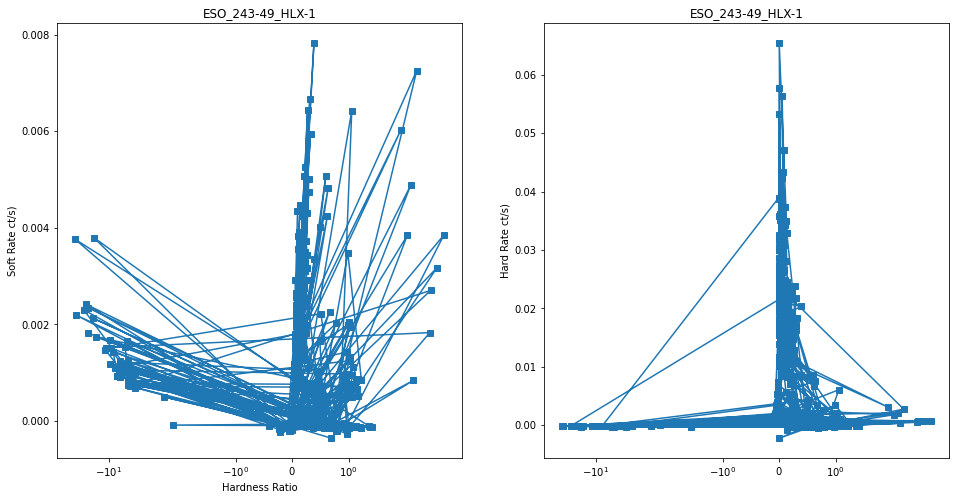

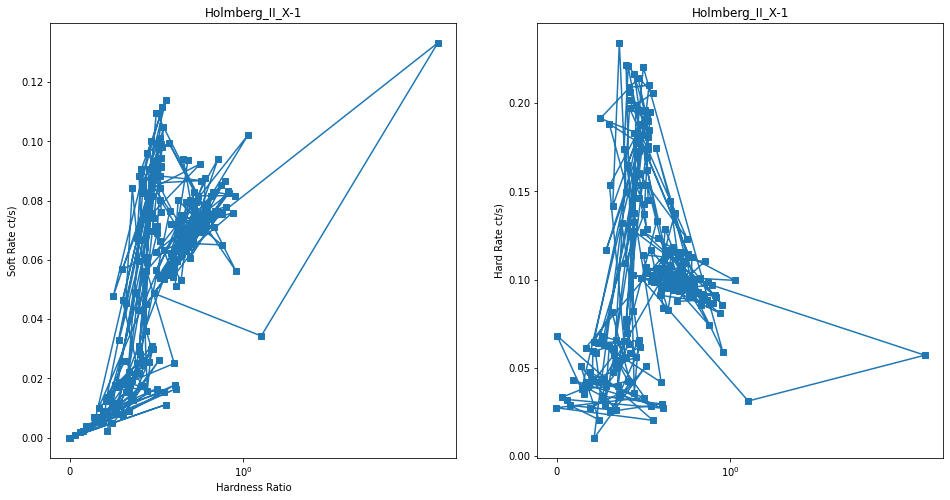

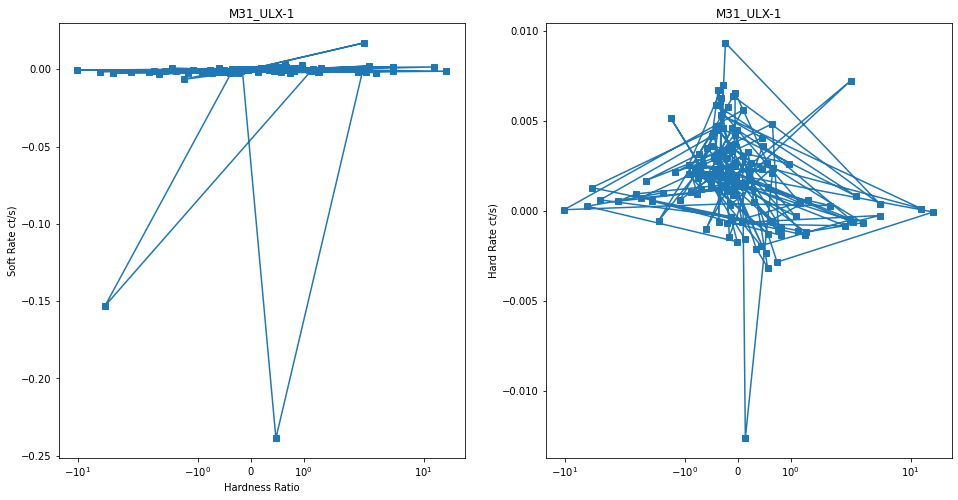

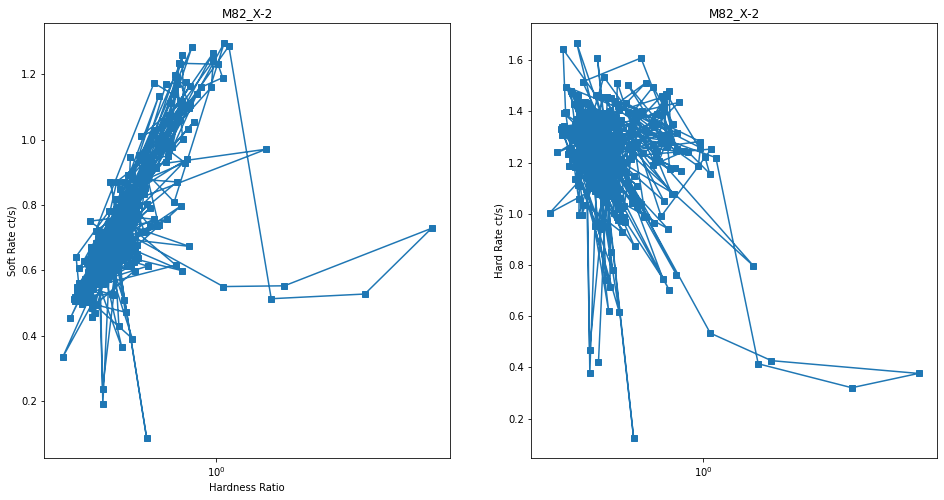

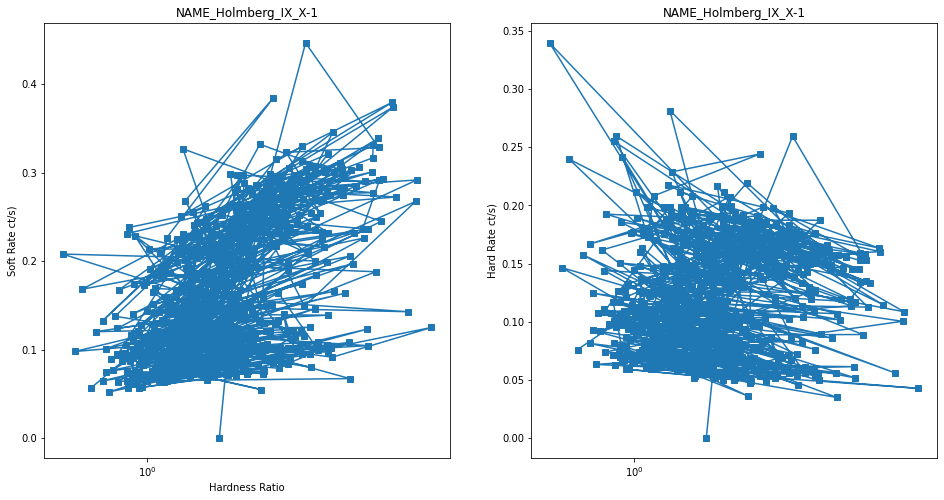

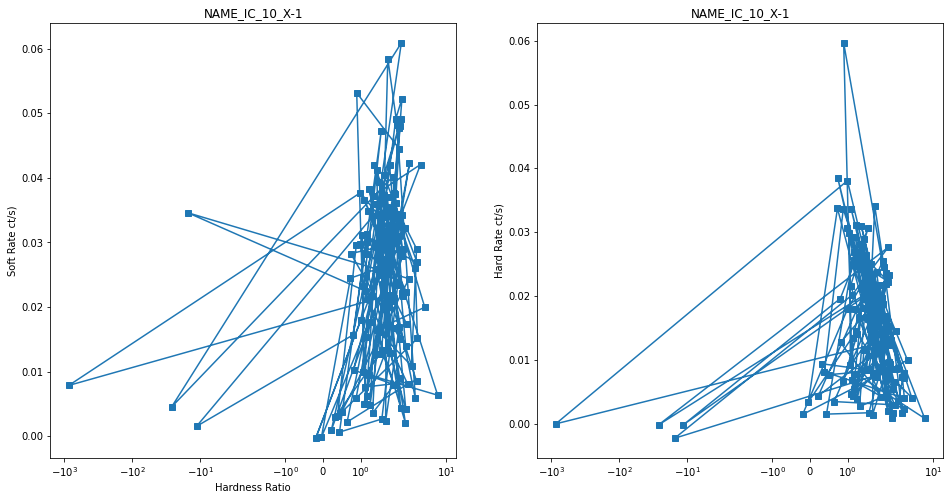

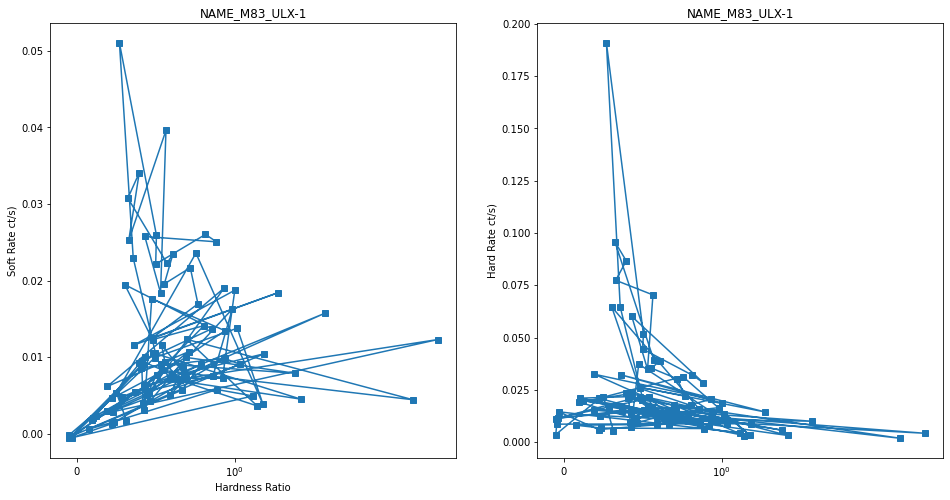

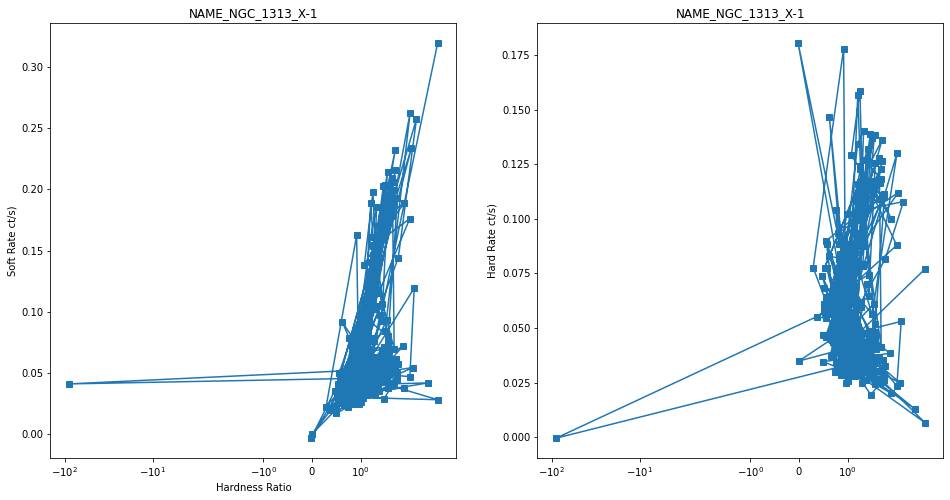

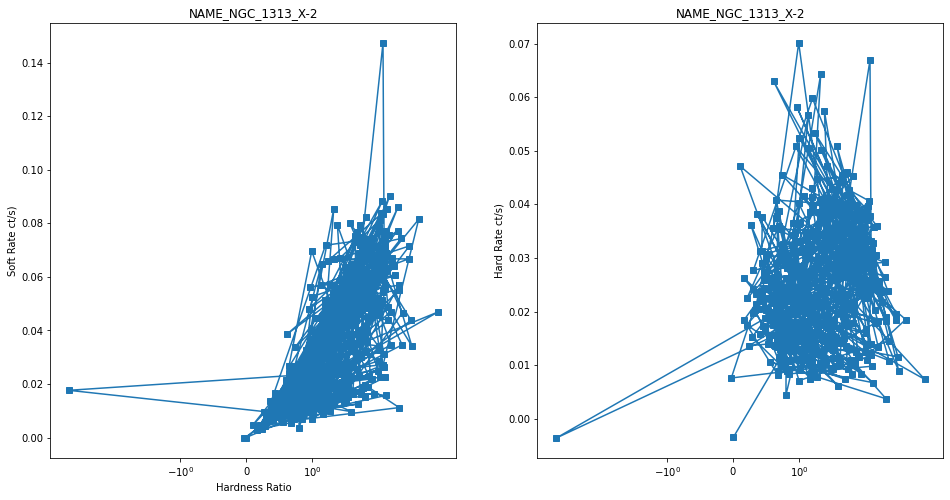

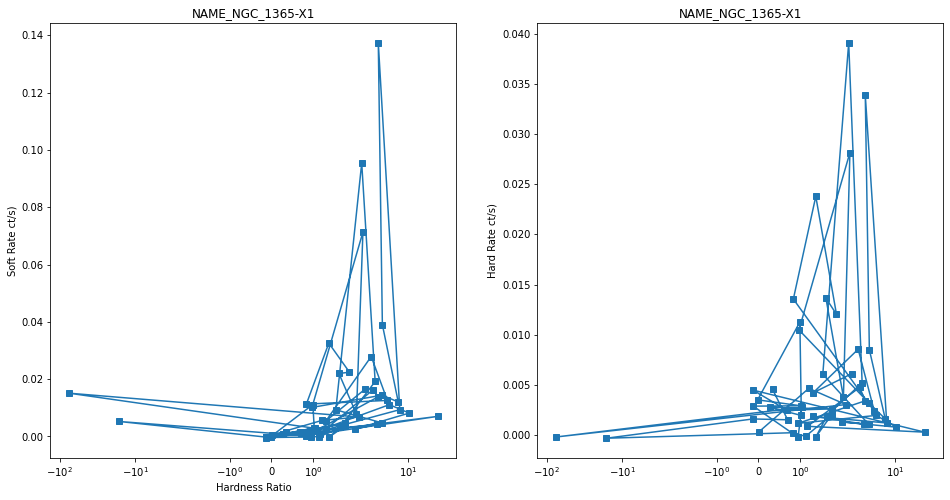

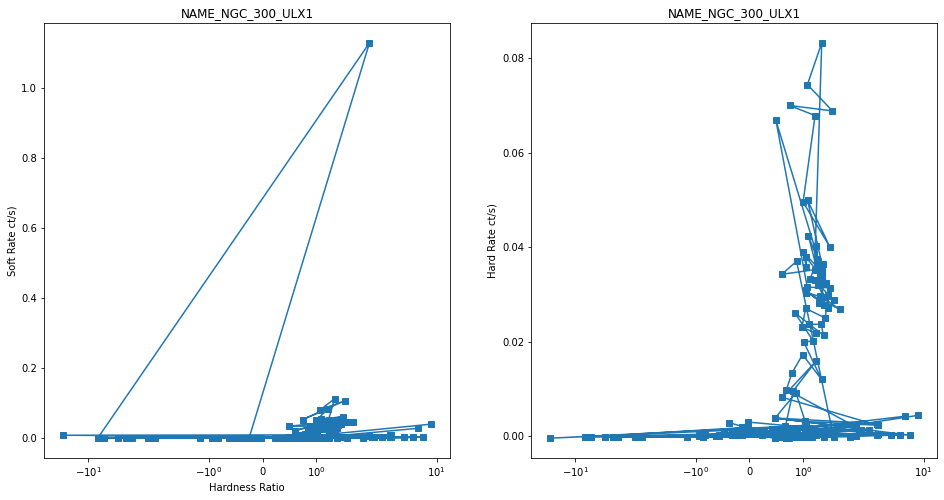

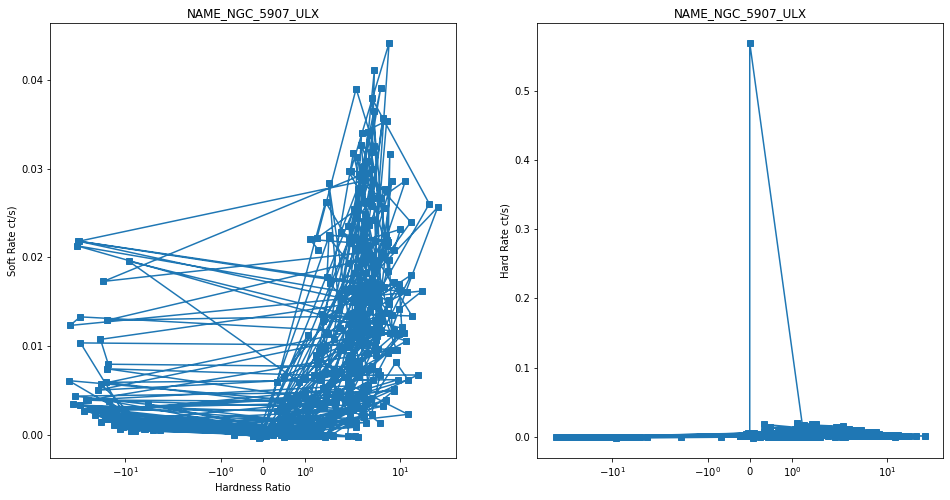

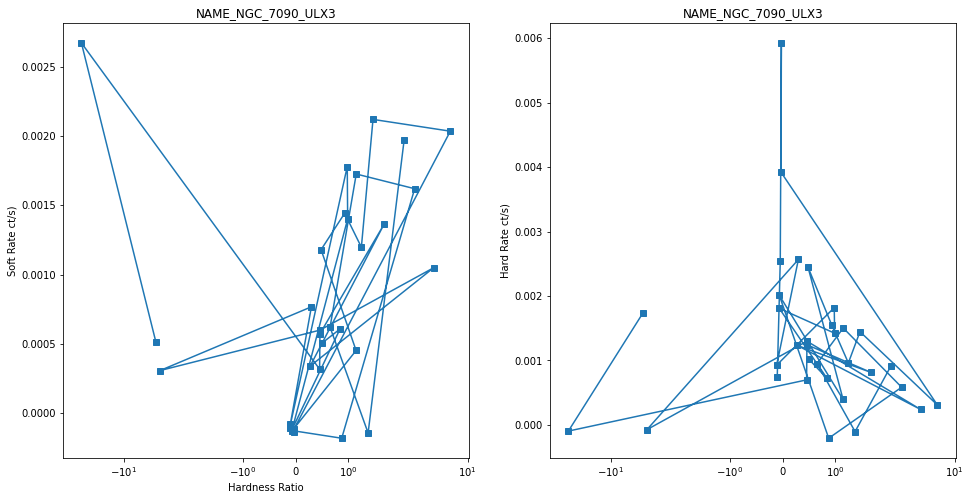

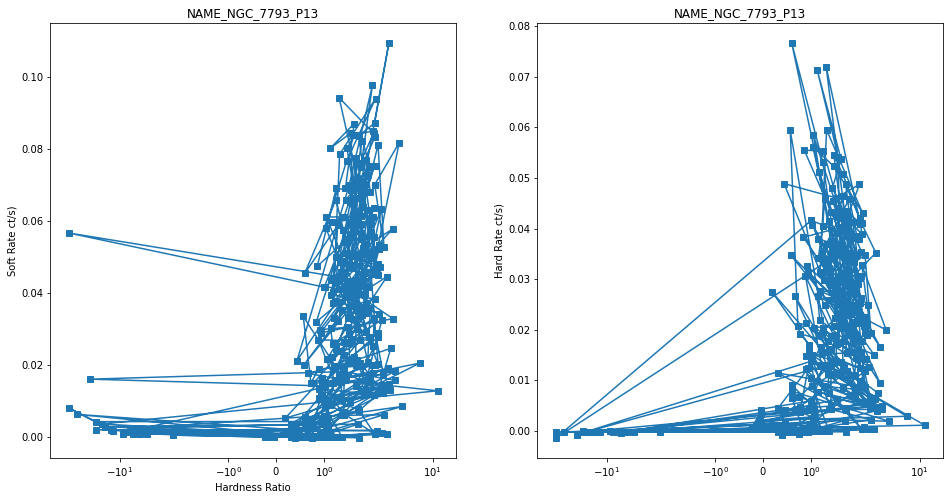

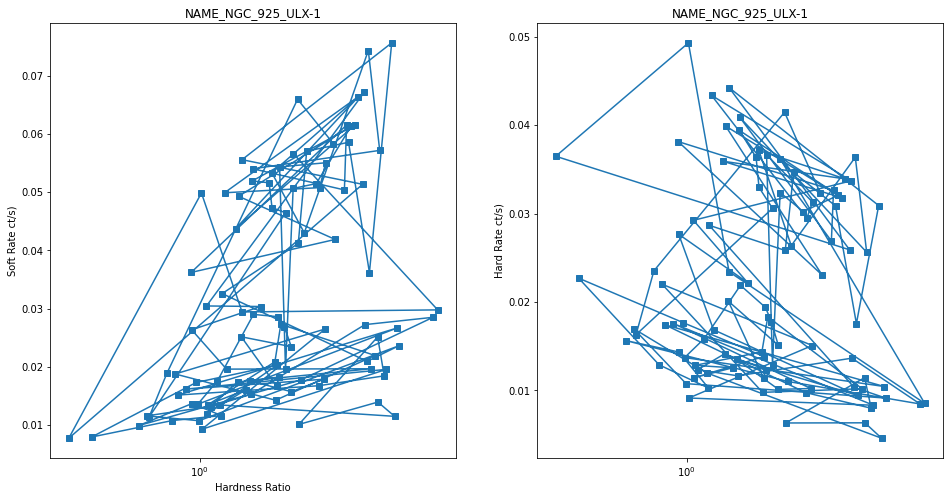

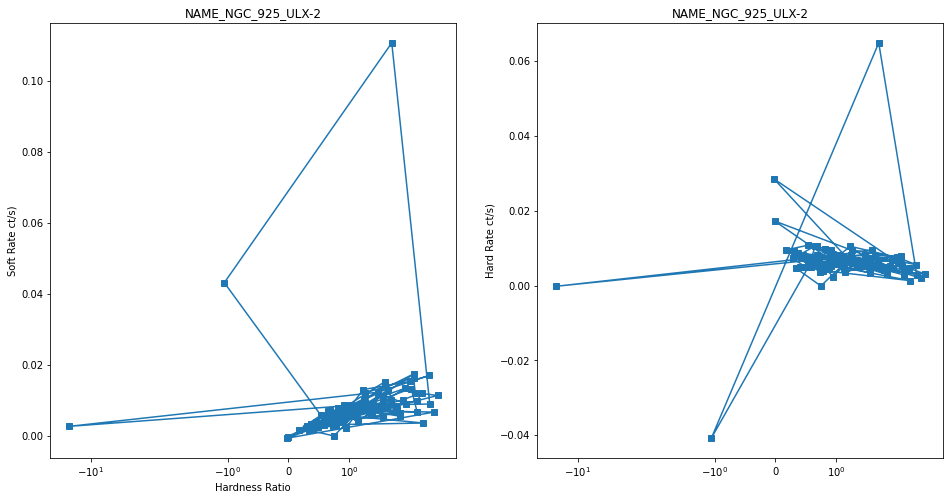

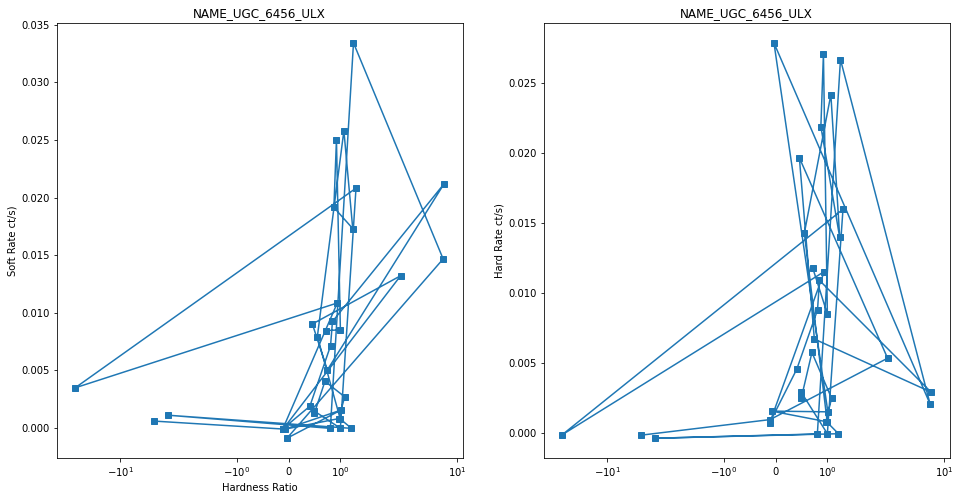

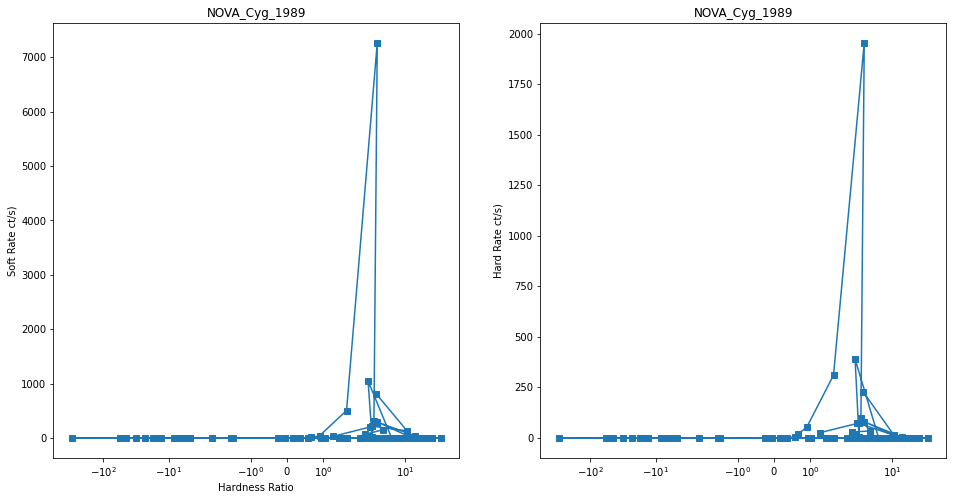

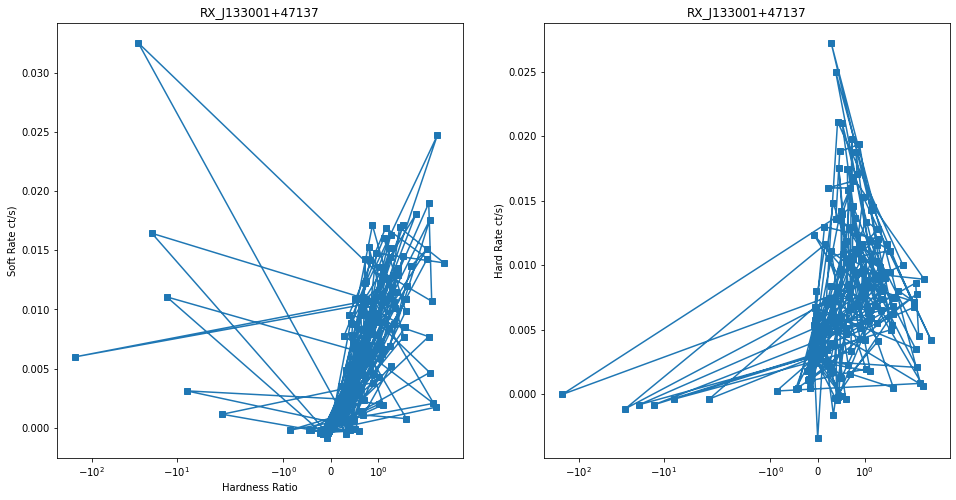

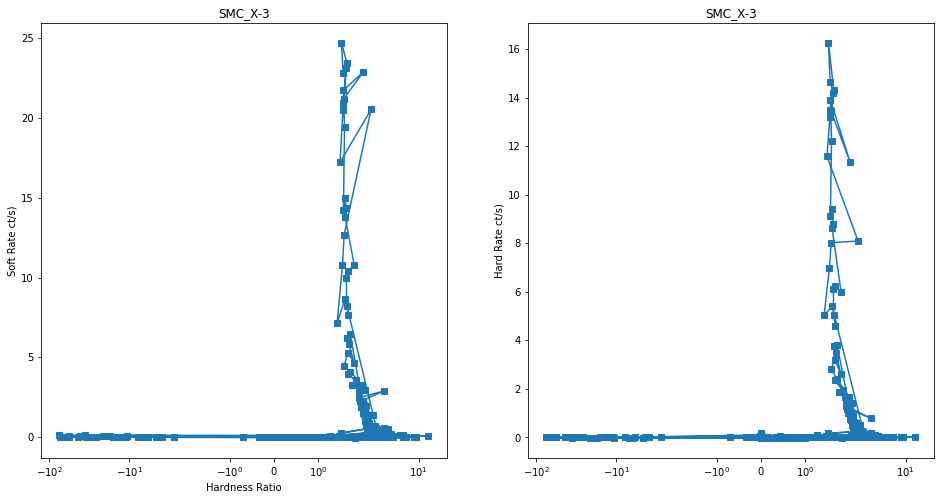

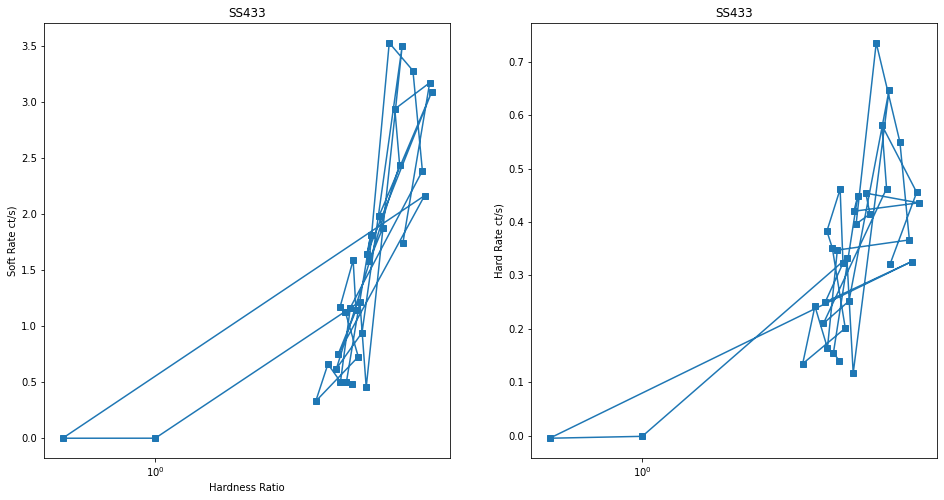

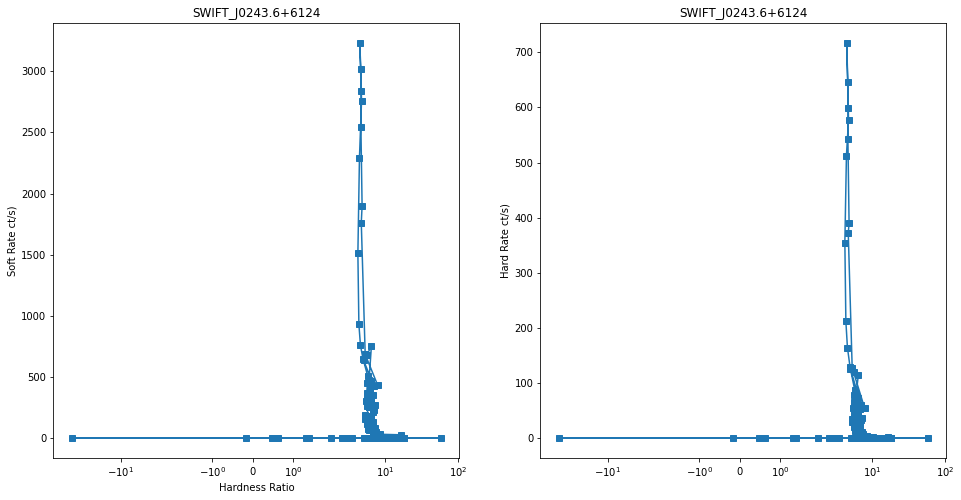

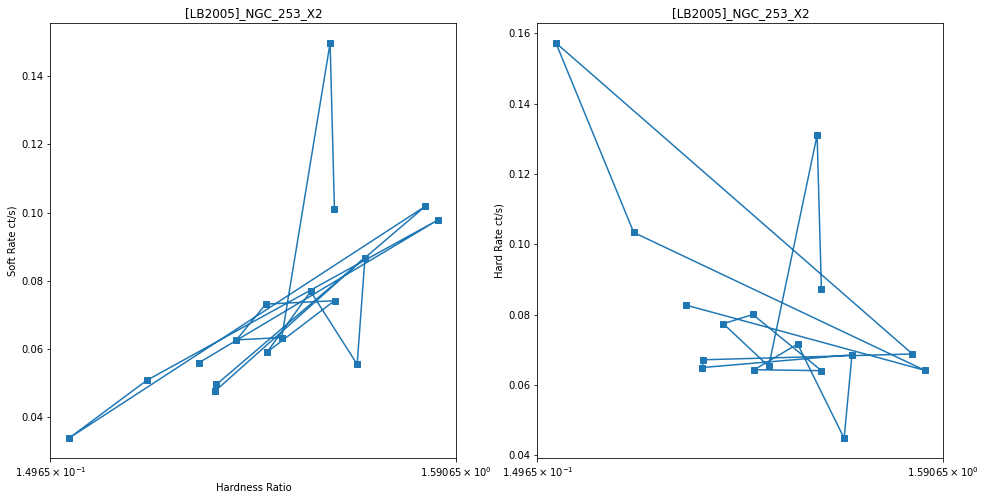

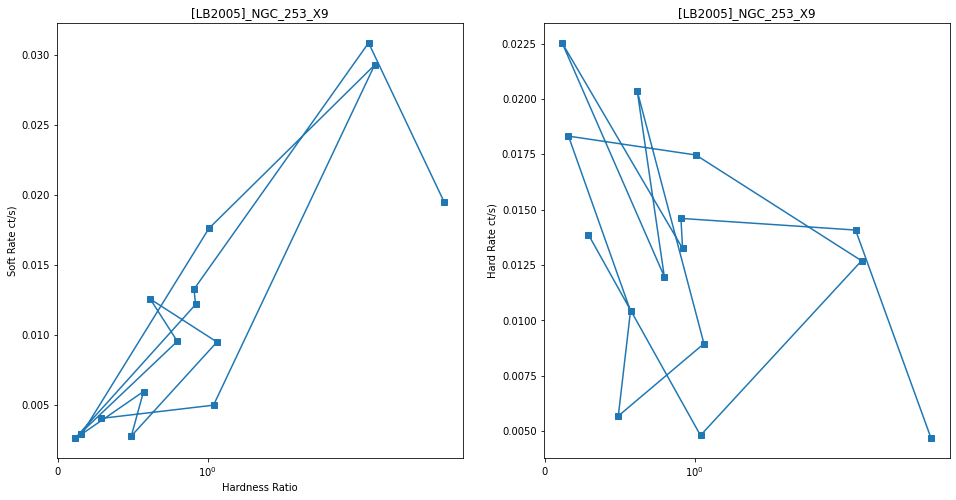

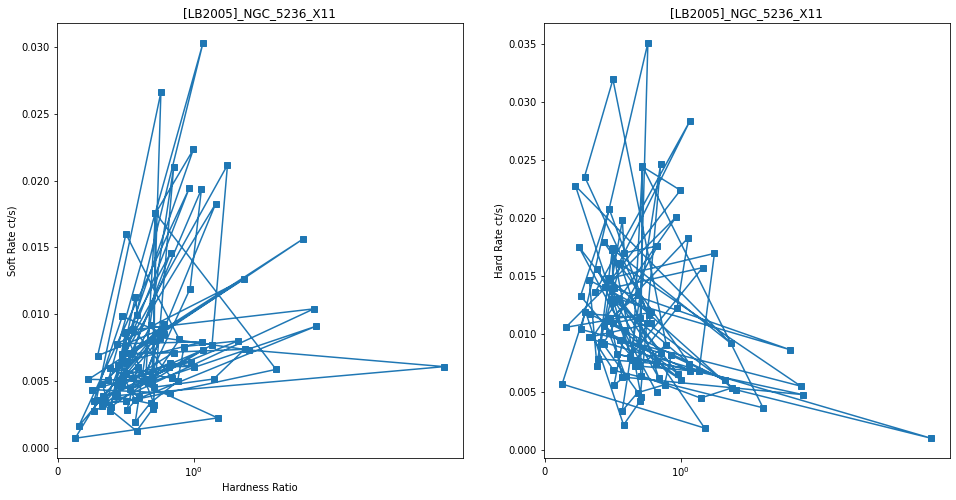

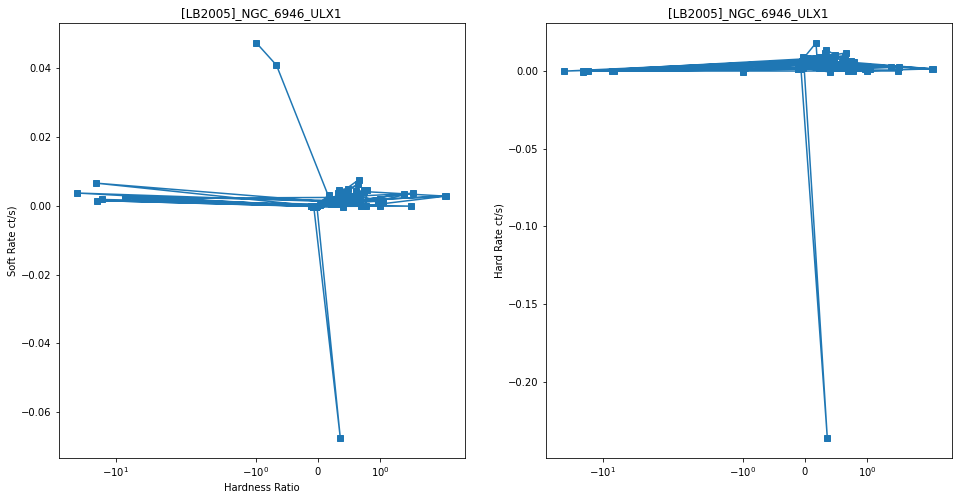

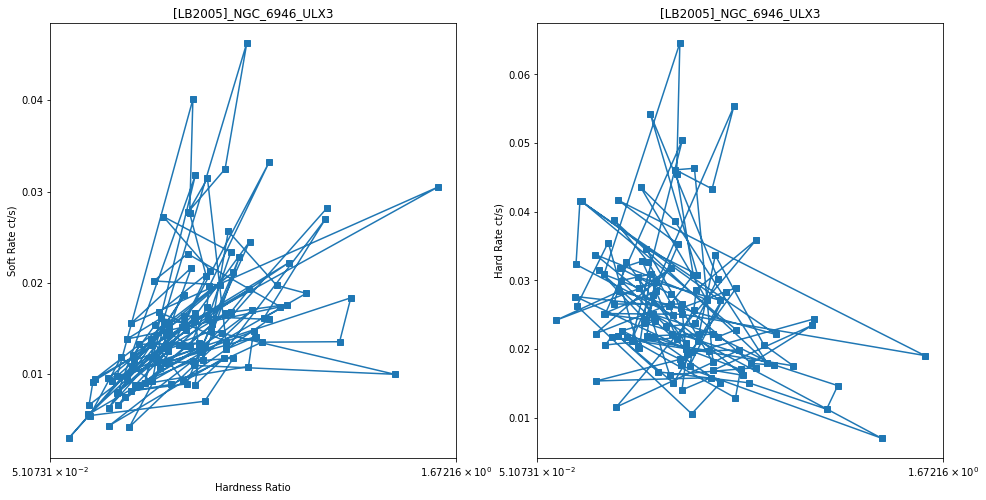

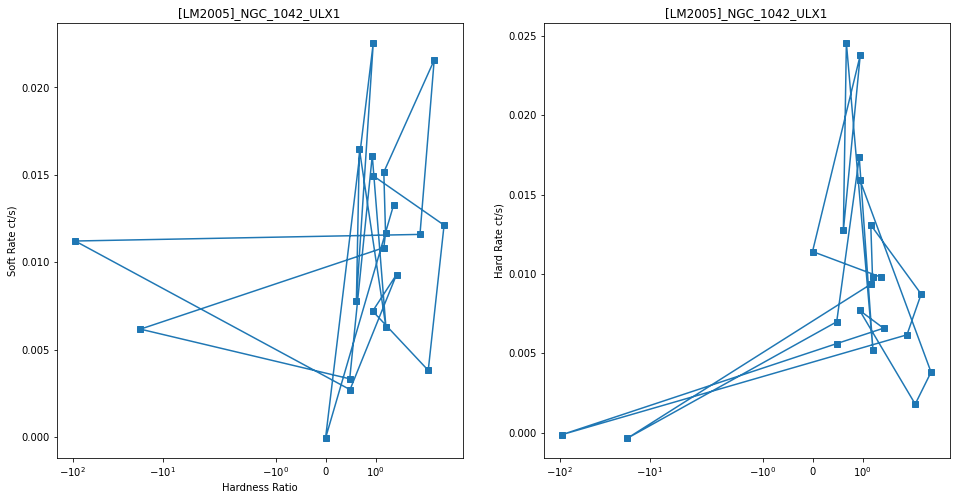

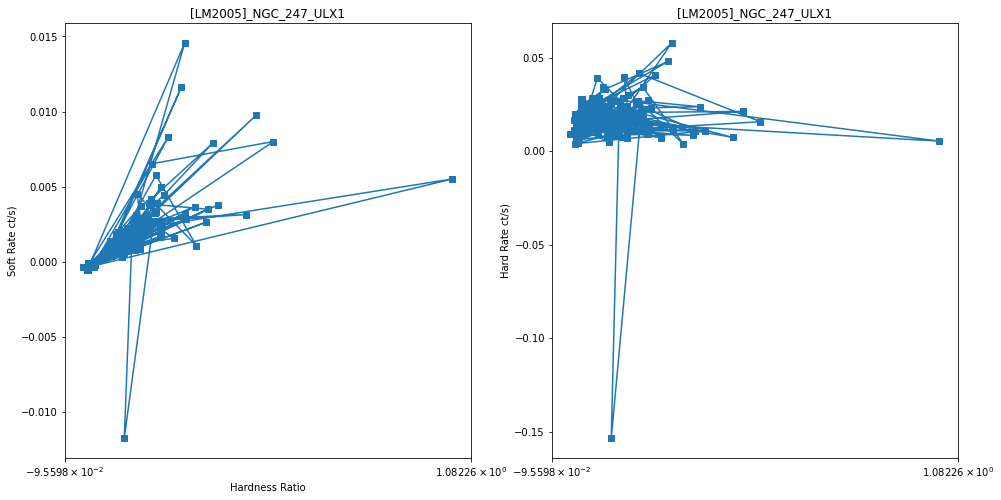

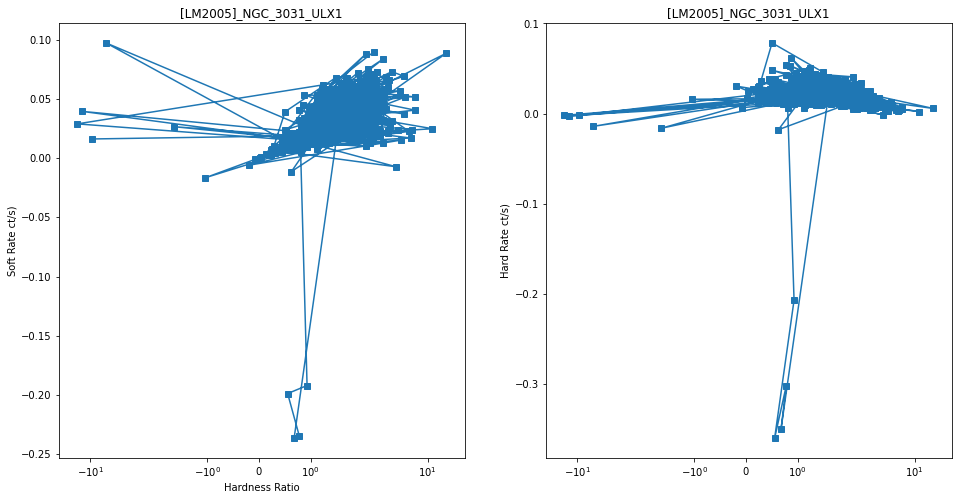

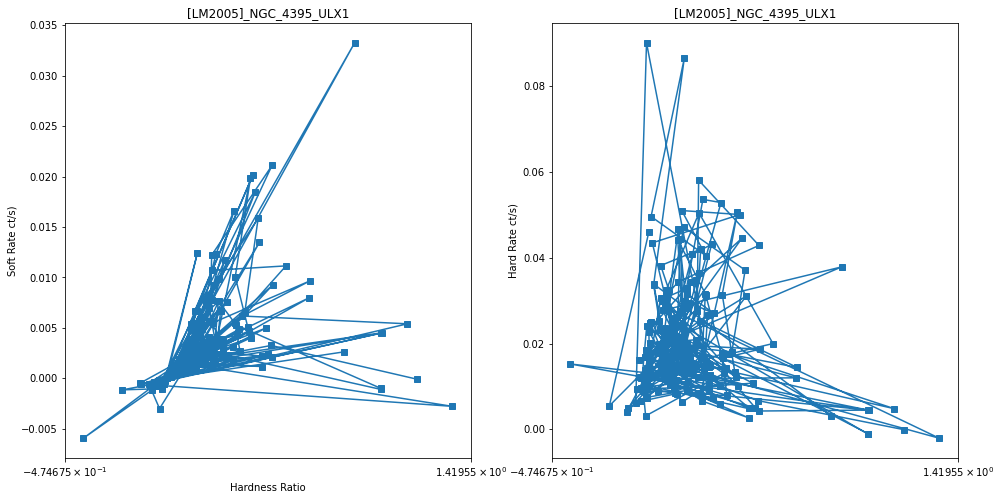

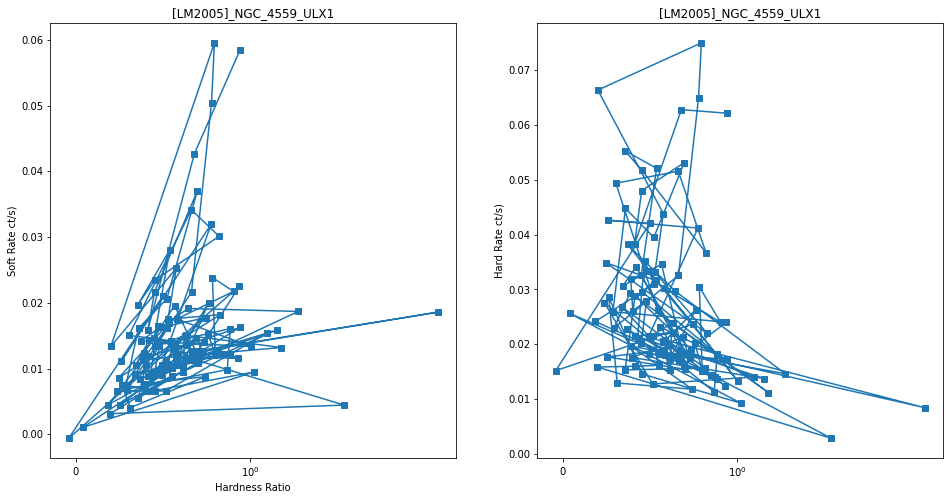

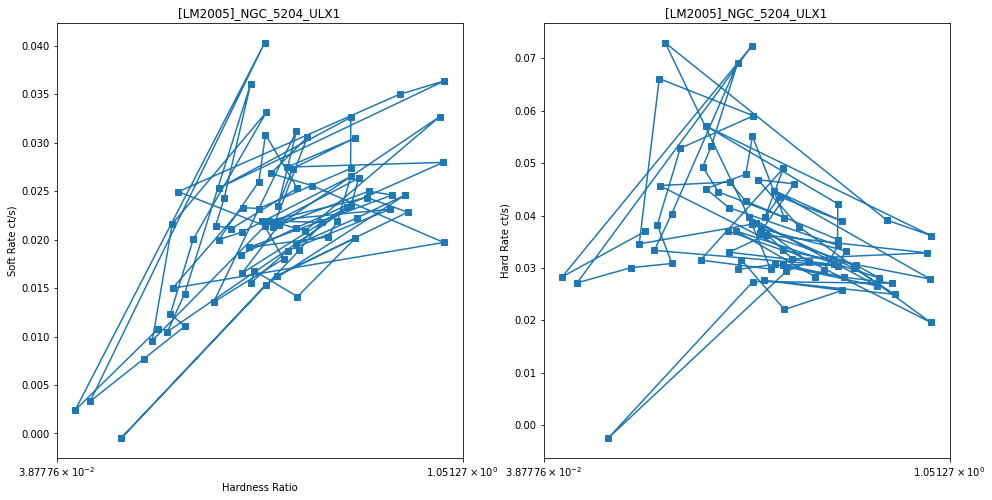

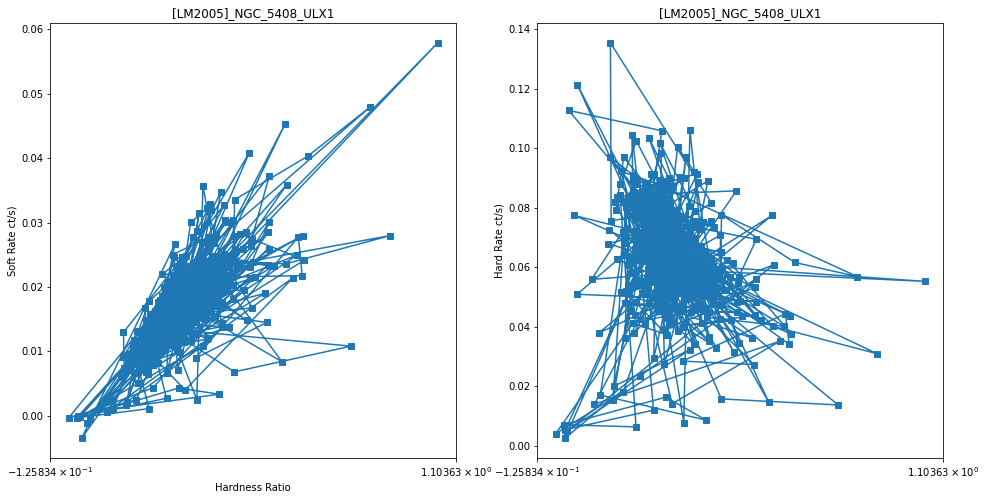

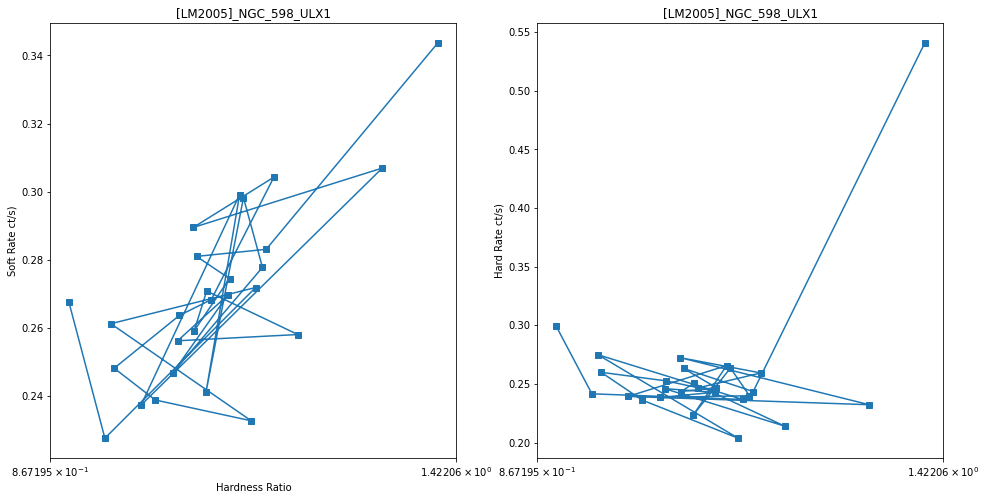

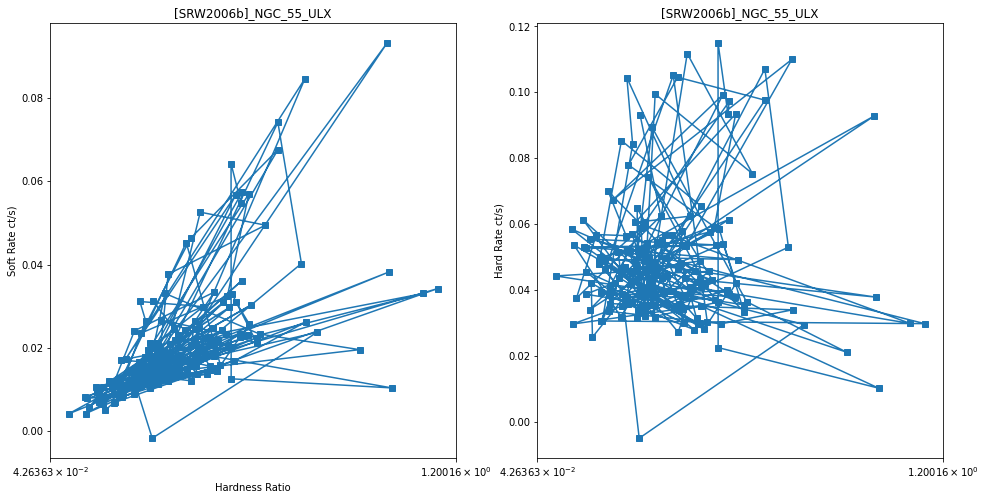

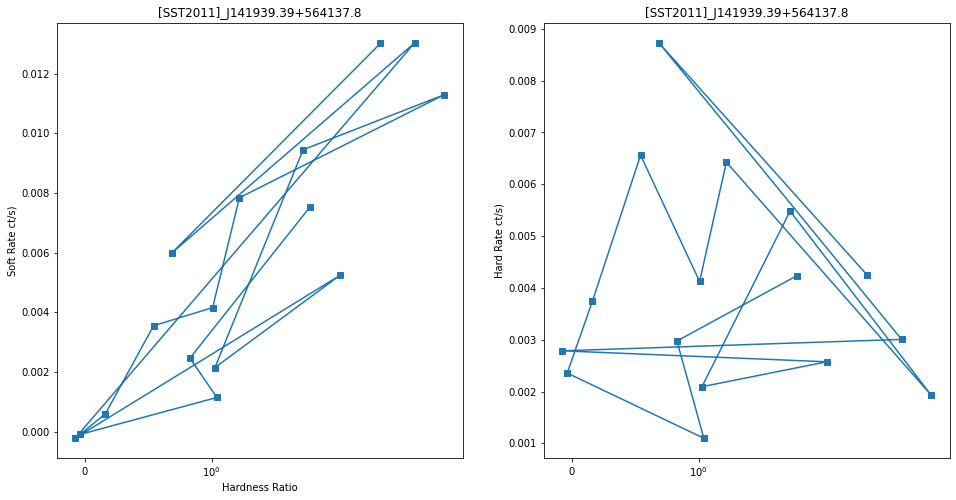

In [3]:
csv_files = glob('../lightcurves/xrt/*hardrat_join.csv')


for csv_file in csv_files:
    plot(csv_file)    

In [4]:
csv_files = glob('../lightcurves/xrt/*hardrat_join.csv')
df = pd.read_csv('../lightcurves/xrt/ESO_243-49_HLX-1,hardrat_join.csv', dtype={'obsID':'string'})

time_s  = df[df['BAND'] == 'SOFT']['MJD'] - df[df['BAND'] == 'SOFT']['MJD'].min()
rate_s  = df[df['BAND'] == 'SOFT']['Rate']
rate_h  = df[df['BAND'] == 'HARD']['Rate']
rate_hr = df[df['BAND'] == 'HR']['Rate']

In [5]:
def plot_color(x, y, z, ax, norm, cmap='viridis'):
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(z)
    lc.set_linewidth(1)
    
    c = plt.cm.viridis(norm(z))
    ax.scatter(x, y, c=c, marker='s', s=30)
    line = ax.add_collection(lc)

    cbar = fig.colorbar(line, ax=ax)
    cbar.set_label('MJD')
    

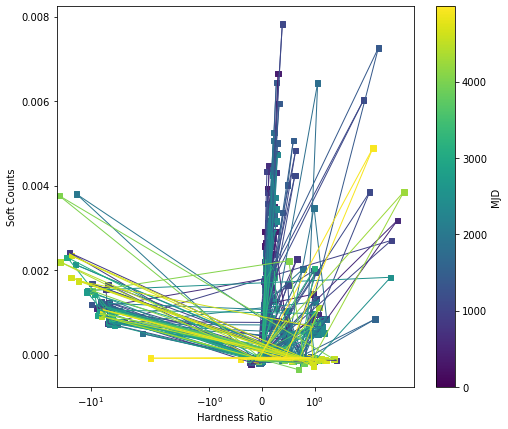

In [8]:
x = rate_hr.values
y = rate_h.values
z = time_s.values  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(figsize=(8,7))

norm = plt.Normalize(z.min(), z.max())
plot_color(x, y, z, ax, norm, cmap='viridis')


#ax.axvline(0, color='red')
ax.set_xlabel('Hardness Ratio')
ax.set_ylabel('Soft Counts')
#ax.set_xlim(-0.01,0.08)
#ax.set_ylim(-0.0,5)
#ax.set_yscale('log')
ax.set_xscale('symlog')